# Link Prediction In Social Network

In [1]:
import networkx as nx
import pandas as pd
import math
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
def Pair_Of_Nodes(g):
    nodes = list(g.nodes) 
    pair_of_nodes = []
    for i in range(0, len(nodes)):
        for j in range(i+1, len(nodes)) :
            pair = [nodes[i], nodes[j]]
            pair_of_nodes.append(pair)
    return pair_of_nodes

def Common_NeighboursList(g, all_Pairs):
    commonNeighoursList = {}
    for node1, node2 in all_Pairs :
        commonNeighoursList[str(node1)+" "+str(node2)] = set(nx.common_neighbors(g,node1,node2))
    return  commonNeighoursList 

def getLength(ele):
    length = 0;
    for e in ele:
        length += 1
    return length    

def getDictionaryFromList(input_list) :
    dic = {}
    for ele in input_list :
        dic[str(ele[0])+" "+str(ele[1])] = ele[2]
    return dic  


# Centrality Measures

In [3]:
def Degree_Centrality(g):
    degree_centrality = nx.degree_centrality(g)
    return degree_centrality

def Closeness_Centrality(g):
    closeness_centrality = nx.closeness_centrality(g)
    return closeness_centrality

def Betweenness_Centrality(g):
    betweenness_centrality = nx.betweenness_centrality(g)
    return betweenness_centrality

def Page_Rank(g):
    page_rank=nx.pagerank(g)
    return page_rank

def H_Index(g):
    h_index={}
    for node in g.nodes():
        max_h_index=g.degree(node) 
        result=-1
        for i in range (0,max_h_index+1):
            total_nodes=0
            for neighbor in g.neighbors(node):
                if(g.degree(neighbor)>=i):
                    total_nodes=1+total_nodes;
            if(total_nodes>=i):
                result=max(result,i)
        h_index[node]=result      
    return h_index   
        
def Coreness(g,k_shell):
    coreness={}
    for node in g.nodes(): 
        sum=0
        for neighbor in g.neighbors(node):
            sum=sum + k_shell[neighbor]   
            #sum=sum+d[node]
        coreness[node]=sum
    return coreness

def K_Shell(g):
    k_shell = nx.core_number(g)
    return k_shell

## Similarity Measures

In [4]:
def Common_Neighbours(g, pair_of_nodes):
    common_neighbours = []
    for node1, node2 in pair_of_nodes:
        length = len(list((nx.common_neighbors(g,node1,node2))))
        temp = [node1, node2, length ]
        common_neighbours.append(temp) 
    return common_neighbours
    
def Jaccard_Coefficient(g, pair_of_nodes):    
    return nx.jaccard_coefficient(g,pair_of_nodes)


def AdamicAdar(g, pair_of_nodes):
    return nx.adamic_adar_index(g, pair_of_nodes)

def Preferential_Attachment(g, pair_of_nodes):
    return nx.preferential_attachment(g, pair_of_nodes)

def Salton(g, pair_of_nodes, common_neighbour_dict):
    Salton_values = []
    for node1, node2 in pair_of_nodes:
        val = math.sqrt(g.degree(node1)*g.degree(node2))
        if val == 0 : val = 1
        tempVal = len(common_neighbour_dict.get(str(node1) + " " + str(node2)))/val
        temp = [node1, node2 , tempVal]
        Salton_values.append(temp)
    return Salton_values 


## Jazz Musician DataSet

In [5]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('/Users/abhijeet/Downloads/arenas-jazz/jazzMusicians.txt',delim_whitespace=True,names=('SRC', 'TGT'))
#names=('SRC', 'TGT')
print(data.head(170))
len(data)

     SRC  TGT
0      1   10
1      1   11
2      1   12
3      1   13
4      1   14
..   ...  ...
165    7  128
166    7   13
167    7  130
168    7  133
169    7  137

[170 rows x 2 columns]


2742

In [6]:
independent_variable = {}
dependent_variable = {}
train, test = train_test_split(data, test_size = 0.2)
train = train.values.tolist()
test = test.values.tolist()

tra = []
tst = []
testSet = set()
for dt in range(0,len(train)) :
    node1 = train[dt][0] if train[dt][0] <= train[dt][1] else train[dt][1]  
    node2 = train[dt][0] if train[dt][0] >= train[dt][1] else train[dt][1]
    if node1 == node2 : continue
    else : tra.append([node1, node2])  

train = tra    
    
for dt in range(0,len(test)) :
    node1 = test[dt][0] if test[dt][0] <= test[dt][1] else test[dt][1]  
    node2 = test[dt][0] if test[dt][0] >= test[dt][1] else test[dt][1]
    if node1 == node2 : continue
    else : 
        tst.append([node1, node2])
        testSet.add(str(node1)+" "+str(node2))
      
test = tst    

In [7]:
print(len(testSet))
print(len(test))
print(len(train))



549
549
2193


In [8]:
len(data)

2742

In [9]:
len(test) + len(train)

2742

In [10]:
graph = nx.Graph()
for node in range(1,194) : #194 is the total number of nodes
    graph.add_node(node)

In [11]:
for dt in range(0,len(train)):
    graph.add_edge(train[dt][0],train[dt][1])         
print(len(graph.nodes))
print(len(graph.edges))

198
2193


### Jazz Musician Graph

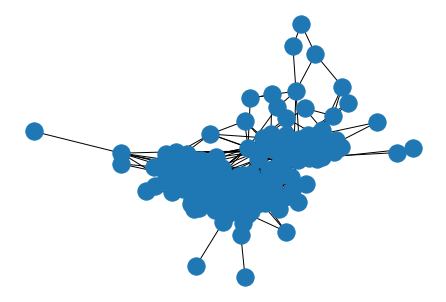

In [12]:
nx.draw(graph)
plt.show()

In [13]:
def plot_deg_dist(G):
    my_degree = nx.degree(G)
    all_degrees = [v for k , v in my_degree]
    unique_degrees = list(set(all_degrees))
    
    count_of_degrees = []
    for i in unique_degrees:
        x = all_degrees.count(i)
        count_of_degrees.append(x)
    
    plt.plot(unique_degrees, count_of_degrees)
    plt.xlabel('Degrees')
    plt.ylabel('Number of Nodes')
    plt.title('Degree Distribution')
    plt.show()

### Degree Distribution Curve

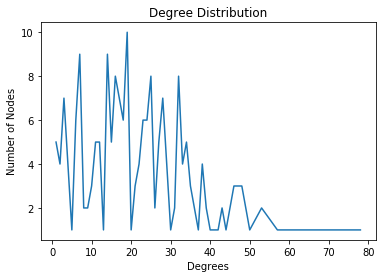

In [14]:
plot_deg_dist(graph)

In [15]:
all_pairs_of_nodes = Pair_Of_Nodes(graph)
common_neighbour_dictionary = Common_NeighboursList(graph, all_pairs_of_nodes)  

In [16]:
len(all_pairs_of_nodes)

19503

In [17]:
len(common_neighbour_dictionary)

19503

In [18]:
pairs_To_Be_Examined = set()
for node1, node2 in all_pairs_of_nodes :
    pairs_To_Be_Examined.add((node1, node2))
    independent_variable[str(node1)+" "+str(node2)] = []
    dependent_variable[str(node1)+" "+str(node2)] = 0

In [19]:
len(pairs_To_Be_Examined)


19503

In [20]:
len(independent_variable)

19503

In [21]:
for dt in range(0,len(train)):
    node1 = train[dt][0] if train[dt][0] <= train[dt][1] else train[dt][1]  
    node2 = train[dt][0] if train[dt][0] >= train[dt][1] else train[dt][1]
    pairs_To_Be_Examined.discard((node1, node2))
    dependent_variable[str(node1)+" "+str(node2)] = 1

In [22]:
len(pairs_To_Be_Examined)

17310

In [23]:
for dt in range(0,len(test)):
    node1 = test[dt][0] if test[dt][0] <= test[dt][1] else test[dt][1]  
    node2 = test[dt][0] if test[dt][0] >= test[dt][1] else test[dt][1]
    dependent_variable[str(node1)+" "+str(node2)] = 1       

In [24]:
degree_Centrality = Degree_Centrality(graph)
closeness_Centrality = Closeness_Centrality(graph)
betweenness_Centrality = Betweenness_Centrality(graph)
page_Rank = Page_Rank(graph)
h_Index = H_Index(graph) 
k_Shell = K_Shell(graph)
coreness = Coreness(graph,k_Shell)

In [25]:
common_Neighbours = Common_Neighbours(graph, all_pairs_of_nodes)

In [26]:
common_Neighbours = getDictionaryFromList(common_Neighbours)

In [27]:
jaccard_Coefficient = Jaccard_Coefficient(graph, all_pairs_of_nodes)
jaccard_Coefficient = getDictionaryFromList(jaccard_Coefficient)

In [28]:
adamicAdar = AdamicAdar(graph, all_pairs_of_nodes) 
adamicAdar = getDictionaryFromList(adamicAdar)

preferential_Attachment = Preferential_Attachment(graph, all_pairs_of_nodes) 
preferential_Attachment = getDictionaryFromList(preferential_Attachment)

salton = Salton(graph, all_pairs_of_nodes, common_neighbour_dictionary)
salton = getDictionaryFromList(salton) 

In [29]:
centrality_measures = [degree_Centrality, closeness_Centrality, betweenness_Centrality, page_Rank, h_Index, k_Shell , coreness]
similarity_measures = [common_Neighbours, jaccard_Coefficient, adamicAdar, preferential_Attachment, salton]

In [30]:
len(centrality_measures[2])

198

In [32]:
centrality_measures_name = ["degree_Centrality", "closeness_Centrality", "betweenness_Centrality", "page_Rank", "h_Index", "k_Shell", "coreness"]
similarity_measures_name = ["common_Neighbours", "jaccard_Coefficient", "adamicAdar", "preferential_Attachment", "salton"]

In [33]:
centrality_measures_name

['degree_Centrality',
 'closeness_Centrality',
 'betweenness_Centrality',
 'page_Rank',
 'h_Index',
 'k_Shell',
 'coreness']

In [34]:
for node1, node2 in all_pairs_of_nodes :
    sim_arr = []
    for j in range(len(similarity_measures_name)):
        sim_arr.append(similarity_measures[j][str(node1)+" "+str(node2)]) 
    independent_variable[str(node1)+" "+str(node2)] = sim_arr

In [35]:
len(pairs_To_Be_Examined)

17310

In [36]:
final_list = []
results = []
for i in range(len(centrality_measures_name)) :
        for j in range(len(similarity_measures_name)) :
            nodes_value = []
            maxCentrality = 0
            maxSimilarity = 0
            yActual = []
            yPredicted = []
            add = 0
            for node1, node2 in pairs_To_Be_Examined :
                if centrality_measures[i][node1] > maxCentrality : maxCentrality = centrality_measures[i][node1]
                if centrality_measures[i][node2] > maxCentrality : maxCentrality = centrality_measures[i][node2]
                if similarity_measures[j][str(node1)+" "+str(node2)] > maxSimilarity : maxSimilarity = similarity_measures[j][str(node1)+" "+str(node2)]
                value = centrality_measures[i][node1]*centrality_measures[i][node2]*similarity_measures[j][str(node1)+" "+str(node2)]*similarity_measures[j][str(node1)+" "+str(node2)]
                if maxCentrality == 0 : maxCentrality = 1
                if maxSimilarity == 0 : maxSimilarity = 1
                divisor = maxCentrality*maxCentrality*maxSimilarity*maxSimilarity
                value /= divisor
                yPredicted.append(value)
                nodePair = str(node1)+" "+str(node2)
                if nodePair in testSet :
                    yActual.append(int(1))
                else : 
                    yActual.append(int(0))
                nodes_value.append([value, node1, node2])
            auc_roc = roc_auc_score(yActual, yPredicted)
            pre, re, thres = precision_recall_curve(yActual,yPredicted)
            auc_prc = auc(re, pre)
            accuracyParameters = []
            accuracyParameters.append(auc_roc)
            accuracyParameters.append(auc_prc)
            results.append([centrality_measures_name[i],similarity_measures_name[j]] + accuracyParameters)

In [37]:
stats = pd.DataFrame(results,columns = ["centrality","similarity","auc-roc","auc-prc"])
print(stats)
stats.to_csv('Musician-Result.csv') 

                centrality               similarity   auc-roc   auc-prc
0        degree_Centrality        common_Neighbours  0.927665  0.389023
1        degree_Centrality      jaccard_Coefficient  0.949337  0.534342
2        degree_Centrality               adamicAdar  0.935895  0.416186
3        degree_Centrality  preferential_Attachment  0.764522  0.126856
4        degree_Centrality                   salton  0.950638  0.531995
5     closeness_Centrality        common_Neighbours  0.942924  0.439017
6     closeness_Centrality      jaccard_Coefficient  0.957185  0.539949
7     closeness_Centrality               adamicAdar  0.952555  0.474147
8     closeness_Centrality  preferential_Attachment  0.763386  0.122081
9     closeness_Centrality                   salton  0.962134  0.575666
10  betweenness_Centrality        common_Neighbours  0.898441  0.265455
11  betweenness_Centrality      jaccard_Coefficient  0.918319  0.324786
12  betweenness_Centrality               adamicAdar  0.904442  0

In [38]:
for node1, node2 in all_pairs_of_nodes :
    features=[]
    for i in range(len(centrality_measures_name)) :
        for j in range(len(similarity_measures_name)) :
            value = centrality_measures[i][node1]*centrality_measures[i][node2]*similarity_measures[j][str(node1)+" "+str(node2)]*similarity_measures[j][str(node1)+" "+str(node2)]
            features.append(value)
    independent_variable[str(node1)+" "+str(node2)] = features

In [39]:
len(independent_variable)

19503

In [40]:
len(independent_variable[str(2)+" "+str(5)])

35

In [41]:
final_x = []
final_y = []
for node1, node2 in all_pairs_of_nodes :
    final_x.append(independent_variable[str(node1)+" "+str(node2)])
    final_y.append(dependent_variable[str(node1)+" "+str(node2)]) 


## Dolphin DataSet

In [45]:
data1 = pd.read_csv('/Users/abhijeet/Downloads/dolphins 3/dolphins.txt',delim_whitespace=True,names=('SRC', 'TGT'))
print(data1.head())
len(data1)

   SRC  TGT
0    9    4
1   10    6
2   10    7
3   11    1
4   11    3


159

In [46]:
independent_variable = {}
dependent_variable = {}
train, test = train_test_split(data1, test_size = 0.2)
train = train.values.tolist()
test = test.values.tolist()

tra = []
tst = []
testSet = set()
for dt in range(0,len(train)) :
    node1 = train[dt][0] if train[dt][0] <= train[dt][1] else train[dt][1]  
    node2 = train[dt][0] if train[dt][0] >= train[dt][1] else train[dt][1]
    if node1 == node2 : continue
    else : tra.append([node1, node2])  

train = tra    
    
for dt in range(0,len(test)) :
    node1 = test[dt][0] if test[dt][0] <= test[dt][1] else test[dt][1]  
    node2 = test[dt][0] if test[dt][0] >= test[dt][1] else test[dt][1]
    if node1 == node2 : continue
    else : 
        tst.append([node1, node2])
        testSet.add(str(node1)+" "+str(node2))
      
test = tst  

In [47]:
len(train)

127

In [48]:
graph1 = nx.Graph()
for node in range(1,62) : 
    graph1.add_node(node)

In [49]:
for dt in range(0,len(train)):
    graph1.add_edge(train[dt][0],train[dt][1])         
print(len(graph1.nodes))
print(len(graph1.edges))

62
127


## Dolphin DataSet Graph

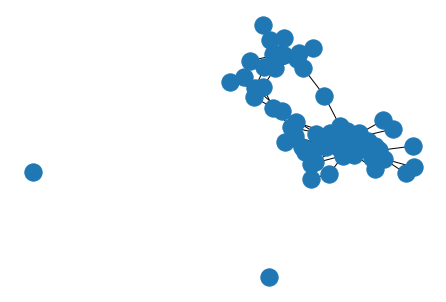

In [50]:
nx.draw(graph1)
plt.show()

### Degreee Distribution Curve

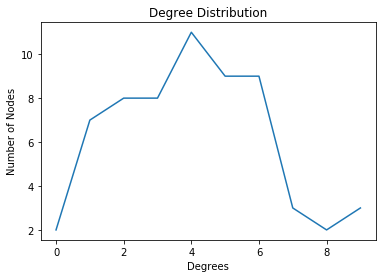

In [51]:
plot_deg_dist(graph1)

In [52]:
all_pairs_of_nodes = Pair_Of_Nodes(graph1)
common_neighbour_dictionary = Common_NeighboursList(graph1, all_pairs_of_nodes)  

In [53]:
len(all_pairs_of_nodes)

1891

In [54]:
pairs_To_Be_Examined = set()
for node1, node2 in all_pairs_of_nodes :
    pairs_To_Be_Examined.add((node1, node2))
    independent_variable[str(node1)+" "+str(node2)] = []
    dependent_variable[str(node1)+" "+str(node2)] = 0

In [55]:
len(pairs_To_Be_Examined)

1891

In [56]:
for dt in range(0,len(train)):
    node1 = train[dt][0] if train[dt][0] <= train[dt][1] else train[dt][1]  
    node2 = train[dt][0] if train[dt][0] >= train[dt][1] else train[dt][1]
    pairs_To_Be_Examined.discard((node1, node2))
    dependent_variable[str(node1)+" "+str(node2)] = 1

In [57]:
len(pairs_To_Be_Examined)

1764

In [58]:
for dt in range(0,len(test)):
    node1 = test[dt][0] if test[dt][0] <= test[dt][1] else test[dt][1]  
    node2 = test[dt][0] if test[dt][0] >= test[dt][1] else test[dt][1]
    dependent_variable[str(node1)+" "+str(node2)] = 1       

In [59]:
degree_Centrality = Degree_Centrality(graph1)
closeness_Centrality = Closeness_Centrality(graph1)
betweenness_Centrality = Betweenness_Centrality(graph1)
page_Rank = Page_Rank(graph1)
h_Index = H_Index(graph1)
k_Shell = K_Shell(graph1)
coreness = Coreness(graph1,k_Shell)

In [60]:
common_Neighbours = Common_Neighbours(graph1, all_pairs_of_nodes)

In [61]:
common_Neighbours = getDictionaryFromList(common_Neighbours)

In [62]:
jaccard_Coefficient = Jaccard_Coefficient(graph1, all_pairs_of_nodes)
jaccard_Coefficient = getDictionaryFromList(jaccard_Coefficient)

In [63]:
adamicAdar = AdamicAdar(graph1, all_pairs_of_nodes) 
adamicAdar = getDictionaryFromList(adamicAdar)

preferential_Attachment = Preferential_Attachment(graph1, all_pairs_of_nodes) 
preferential_Attachment = getDictionaryFromList(preferential_Attachment)

salton = Salton(graph1, all_pairs_of_nodes, common_neighbour_dictionary)
salton = getDictionaryFromList(salton) 

In [64]:
centrality_measures = [degree_Centrality, closeness_Centrality, betweenness_Centrality, page_Rank, h_Index, k_Shell , coreness]
similarity_measures = [common_Neighbours, jaccard_Coefficient, adamicAdar, preferential_Attachment, salton]

In [65]:
for node1, node2 in all_pairs_of_nodes :
    sim_arr = []
    for j in range(len(similarity_measures_name)):
        sim_arr.append(similarity_measures[j][str(node1)+" "+str(node2)]) 
    independent_variable[str(node1)+" "+str(node2)] = sim_arr

In [66]:
final_list = []
results = []
for i in range(len(centrality_measures_name)) :
    alpha = 0.1
    for alpha in range(1) :
        beta = 1 - alpha
        for j in range(len(similarity_measures_name)) :
            nodes_value = []
            maxCentrality = 0
            maxSimilarity = 0
            yActual = []
            yPredicted = []
            add = 0
            for node1, node2 in pairs_To_Be_Examined :
                if centrality_measures[i][node1] > maxCentrality : maxCentrality = centrality_measures[i][node1]
                if centrality_measures[i][node2] > maxCentrality : maxCentrality = centrality_measures[i][node2]
                if similarity_measures[j][str(node1)+" "+str(node2)] > maxSimilarity : maxSimilarity = similarity_measures[j][str(node1)+" "+str(node2)]
                value = centrality_measures[i][node1]*centrality_measures[i][node2]*similarity_measures[j][str(node1)+" "+str(node2)]*similarity_measures[j][str(node1)+" "+str(node2)]
                if maxCentrality == 0 : maxCentrality = 1
                if maxSimilarity == 0 : maxSimilarity = 1
                divisor = maxCentrality*maxCentrality*maxSimilarity*maxSimilarity
                value /= divisor
                yPredicted.append(value)
                nodePair = str(node1)+" "+str(node2)
                if nodePair in testSet :
                    yActual.append(int(1))
                else : 
                    yActual.append(int(0))
                nodes_value.append([value, node1, node2])
            auc_roc = roc_auc_score(yActual, yPredicted)
            pre, re, thres = precision_recall_curve(yActual,yPredicted)
            auc_prc = auc(re, pre)
            accuracyParameters = []
            accuracyParameters.append(auc_roc)
            accuracyParameters.append(auc_prc)
            results.append([centrality_measures_name[i],similarity_measures_name[j]] + accuracyParameters)

In [67]:
for node1, node2 in all_pairs_of_nodes :
    features=[]
    for i in range(len(centrality_measures_name)) :
        for j in range(len(similarity_measures_name)) :
            value = centrality_measures[i][node1]*centrality_measures[i][node2]*similarity_measures[j][str(node1)+" "+str(node2)]*similarity_measures[j][str(node1)+" "+str(node2)]
            features.append(value)
    independent_variable[str(node1)+" "+str(node2)] = features

In [68]:
len(independent_variable)

1891

In [71]:
stats = pd.DataFrame(results,columns = ["centrality","similarity","auc-roc","auc-prc"])
print(stats)
stats.to_csv('dolphins-result.csv') 

                centrality               similarity   auc-roc   auc-prc
0        degree_Centrality        common_Neighbours  0.790073  0.138837
1        degree_Centrality      jaccard_Coefficient  0.797082  0.172124
2        degree_Centrality               adamicAdar  0.797037  0.128379
3        degree_Centrality  preferential_Attachment  0.738705  0.053158
4        degree_Centrality                   salton  0.797570  0.182897
5     closeness_Centrality        common_Neighbours  0.780637  0.135586
6     closeness_Centrality      jaccard_Coefficient  0.783388  0.092037
7     closeness_Centrality               adamicAdar  0.795865  0.111918
8     closeness_Centrality  preferential_Attachment  0.731542  0.053290
9     closeness_Centrality                   salton  0.779094  0.084022
10  betweenness_Centrality        common_Neighbours  0.785652  0.114845
11  betweenness_Centrality      jaccard_Coefficient  0.786500  0.122540
12  betweenness_Centrality               adamicAdar  0.787691  0